### <span style = 'color:green'> Capstone Project </span>
#### <span style = 'color:blue'> Problem statement : Perform sentiment analysis on Omnicron variant, data fetching directly from twitter</span>
**Sentiment analysis is the process of identifying feelings and emotions expressed in words, through ML or AI**

**Project Pipeline**

Various steps in completing project are

- **Import Necessary Dependencies**
- **Read and Load the Dataset**
- **Exploratory Data Analysis**
- **Data Visualization of Target Variables**
- **Data Preprocessing**
- **Splitting our data into Train and Test Subset**
- **Transforming Dataset using TF-IDF Vectorizer**
- **Function for Model Evaluation**
- **Model Building**
- **Conclusion**

- Here we have to get dataset directly fetched from twitter in realtime

- performing realtime sentimental analysis on realtime data collecting from twitter
- objective: perform sentiment analysis on realtime data collected from twitter

                      

           

### <span style = 'color:blue'>   API (Application Programm Interface)</span>
- Imagine you’re sitting at a table in a restaurant with a menu of choices to order from. The kitchen is the part of the “system” that will prepare your order. What is missing is the critical link to communicate your order to the kitchen and deliver your food back to your table. That’s where the waiter or API comes in. The waiter is the messenger – or API – that takes your request or order and tells the kitchen – the system – what to do. Then the waiter delivers the response back to you; in this case, it is the food.
- API's are huge and are used everywhere
- In simple words api stands as bridge for one to access the content in one's storage
- There are many APIs on the Twitter platform that software developers can engage with, with the ultimate possibility to create fully automated systems which will interact with Twitter. While this feature could benefit companies by drawing insights from Twitter data

   **From twitter api it's possible to extract many insights some are**
- Tweets: searching, posting, filtering, engagement, streaming etc.
- Accounts and users (Beta): account management, user interactions.
- Media: uploading and accessing photos, videos and animated GIFs.
- Trends: trending topics in a given location.
- Geo: information about known places or places near a location.

**Getting twitter API keys**
- If you don't already have an account, you can login with your normal Twitter credentials


- follow the required prompts to create a developer project or click here <a href="https://dev.twitter.com/apps" title="Twitter">Click here</a>
- Requesting the API key and secret via the Developer Portal causes Twitter to produce the following three things:
1. API key (this is your 'consumer key')
2. API secret key (this is your 'consumer secret')
3. Bearer token
- Next, visit the 'Authentication Tokens' area of the Developer Portal and generate an 'Access token & secret'. This will provide you with the following two items:
1. Access token (this is your 'token key')
2. Access token secret (this is your 'token secret')


**Expected output**
- the data fetched from twitter should undergo EDA for analyzing, cleaning, handling, manupulation, visualization..,etc
- final output should show the sentiment of the data


  *Some tips to consider*

- Machines can learn in every possible way so its always better to think out of the box
    
- Perform eda as diverse as possible and in contineous manner
    
- Try configuring with diffrent models to know how each model is diffrent with other ones
    
- Donot try to involve unneccesory codes and useless algorithms for dataset which just increases complexity
    
- Approaching problem statement in n number of ways helps us to find best one possible
    
- It's easier for one to understnd and manupulate if we have models as simple as possible
    
- When we have multiple models we can have multiple judgements based on models and their efficiencies
    
- Tuning helps increasing accuracy :)
    
- Have an idea of time consumed by the model, its better to have a model whose time management is good
    
- Spend good amount of time on analyzing dataset and draw as much insights as possible

- Tweepy is importantlibrary we will using to fetch data from twitter by api


For more on tweepy documentation please click here <a href="https://docs.tweepy.org/en/stable/getting_started.html#hello-tweepy" title="Tweepy">Click here</a>

In [45]:
#import necessary dependencies
!pip install tweepy pandas numpy matplotlib seaborn scikit-learn nltk


In [46]:
#importing necessary libraries

import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
nltk.download('stopwords')
nltk.download('punkt')
# Download the 'punkt_tab' resource
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [47]:
#loading dataset
df = pd.read_csv('/content/Twitter_Omicron_data_1_1_1_1_1 (1).csv')

In [48]:
#checking data
df.head()

,tweets,likes,time,retweet_count
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0
2,Long COVID less likely after Omicron than afte...,0,2023-03-09 18:22:43,0
3,The finding don't tally with the high numbers ...,0,2023-03-09 18:21:45,0
4,A conference abstract from the European Congre...,1,2023-03-09 18:21:45,1


In [49]:
#exploratory data analysis
data = df.copy()

# Check for missing values
print(data.isnull().sum())

# View random tweets
data.sample(5)


tweets           0
likes            0
time             0
retweet_count    0
dtype: int64


,tweets,likes,time,retweet_count
2674,@CPTNZacSparrow @matt_pagano @lindathebaglady ...,0,2023-03-06 01:41:57,0
2648,They were basically forcing people to concieve...,0,2023-03-06 02:15:53,0
4063,"@konrad_bilinski @AlexBerenson No, Omicron is ...",0,2023-03-04 05:04:40,0
862,Happy International Women's Day! \n\nFor the m...,0,2023-03-08 14:11:42,0
4411,@shamwowsupernva @Debunk_the_Funk @GVDBossche ...,0,2023-03-03 18:18:32,0


In [50]:
#data preprocessing

stop_words = set(stopwords.words('english'))

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Define stopwords
stop_words = set(stopwords.words('english'))

def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove mentions and hashtags
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove special characters, numbers, and punctuations
    tweet = re.sub(r'[^\w\s]', '', tweet)
    # Tokenize
    tweet = word_tokenize(tweet)
    # Remove stopwords
    tweet = [word for word in tweet if word not in stop_words]
    # Rejoin cleaned words into a single string
    return ' '.join(tweet)

# Apply cleaning to the 'tweets' column
data['cleaned_tweet'] = data['tweets'].apply(clean_tweet)
data.head()





,tweets,likes,time,retweet_count,cleaned_tweet
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0,6 big questions new omicrontargeting boosters ...
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0,im confused
2,Long COVID less likely after Omicron than afte...,0,2023-03-09 18:22:43,0,long covid less likely omicron original virus ...
3,The finding don't tally with the high numbers ...,0,2023-03-09 18:21:45,0,finding dont tally high numbers see bulletins ...
4,A conference abstract from the European Congre...,1,2023-03-09 18:21:45,1,conference abstract european congress clinical...


In [51]:
data.value_counts()

tweets                                                                                                                                                                                                                                                                                likes  time                 retweet_count  cleaned_tweet                                                                                                                                            
"""My friends and I have always believed that e-cigarette pneumonia is COVID-19, and now an authority has finally confirmed that our guess is correct.\n#COVID19\n#COVID-19\n#COVID\n#Omicron\nhttps://t.co/GrMZB5972i""\n"                                                           0      2023-03-04 08:47:34  0              friends always believed ecigarette pneumonia covid19 authority finally confirmed guess correct covid19 covid19 covid omicron                                 1
BREAKING: The U.S. death toll from COVID-19 has hit 900,000 — less than two months after eclipsing 800,000 — propelled in part by the wildly contagious omicron variant. #discrimination\n https://t.co/9YPaWRZrPc                                                                    0      2023-03-06 02:50:55  0              breaking us death toll covid19 hit 900000 less two months eclipsing 800000 propelled part wildly contagious omicron variant discrimination                   1
BREAKING: The U.S. death toll from COVID-19 has hit 900,000 — less than two months after eclipsing 800,000 — propelled in part by the wildly contagious omicron variant. https://t.co/9YPaWRZZEK #hegemony                                                                            0      2023-03-02 01:56:17  0              breaking us death toll covid19 hit 900000 less two months eclipsing 800000 propelled part wildly contagious omicron variant hegemony                         1
BREAKING: The U.S. death toll from COVID-19 has hit 900,000 — less than two months after eclipsing 800,000 — propelled in part by the wildly contagious omicron variant. https://t.co/9YPaWRZZEK #free                                                                                0      2023-03-08 03:07:40  0              breaking us death toll covid19 hit 900000 less two months eclipsing 800000 propelled part wildly contagious omicron variant free                             1
                                                                                                                                                                                                                                                                                             2023-03-01 07:35:57  0              breaking us death toll covid19 hit 900000 less two months eclipsing 800000 propelled part wildly contagious omicron variant free                             1
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             ..
@RWMaloneMD The same LAB released the Omicron variant im china 2020 to end the more dangerous virus  \nTook 1 year for the omicron to spread to the rest of the world.\n\nBest vaccine is a milder infection of omicron...                                                            0      2023-03-03 11:27:28  0              lab released omicron variant im china 2020 end dangerous virus took 1 year omicron spread rest world best vaccine milder infection omicron                   1
@RWMaloneMD Dear Dr. Malone, I cannot agree with your  notion that ADE is not a big deal for COVID-19.  Please see this post for more details on what a big deal it w

In [52]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER Lexicon
nltk.download('vader_lexicon')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Example Dataset
data = pd.read_csv('/content/Twitter_Omicron_data_1_1_1_1_1 (1).csv')
# Function for Sentiment Classification
def classify_sentiment(tweet):
    score = sia.polarity_scores(tweet)
    if score['compound'] > 0.05:
        return 'Positive'
    elif score['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply Classification
data['sentiment'] = data['tweets'].apply(classify_sentiment)

# Display Results
print(data)


# Save the labeled data to a CSV file
data.to_csv('labeled_tweets.csv', index=False)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                 tweets  likes  \
0     6 big questions about new Omicron-targeting bo...      0   
1                  I'm confused https://t.co/NyfgdYUYAT      0   
2     Long COVID less likely after Omicron than afte...      0   
3     The finding don't tally with the high numbers ...      0   
4     A conference abstract from the European Congre...      1   
...                                                 ...    ...   
6993  @Cycl_Conscience @BallouxFrancois Your argumen...      1   
6994  @BretWeinstein I don't think it escaped, they ...      0   
6995  @_50kgold Do you have to show your face? I'd b...      0   
6996  @noxcato @andrewtanyongyi @TAH_Sci @hsom113 @M...      1   
6997  In light of the fact that #Omicron is unrelate...      0   

                     time  retweet_count sentiment  
0     2023-03-09 18:24:06              0   Neutral  
1     2023-03-09 18:23:43              0  Negative  
2     2023-03-09 18:22:43              0  Positi

In [53]:
#viewing labeled dataset

data = pd.read_csv('/content/labeled_tweets.csv')
data.head()


,tweets,likes,time,retweet_count,sentiment
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0,Neutral
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0,Negative
2,Long COVID less likely after Omicron than afte...,0,2023-03-09 18:22:43,0,Positive
3,The finding don't tally with the high numbers ...,0,2023-03-09 18:21:45,0,Neutral
4,A conference abstract from the European Congre...,1,2023-03-09 18:21:45,1,Neutral


<ipython-input-54-c9e87682be09>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=data, palette='viridis')


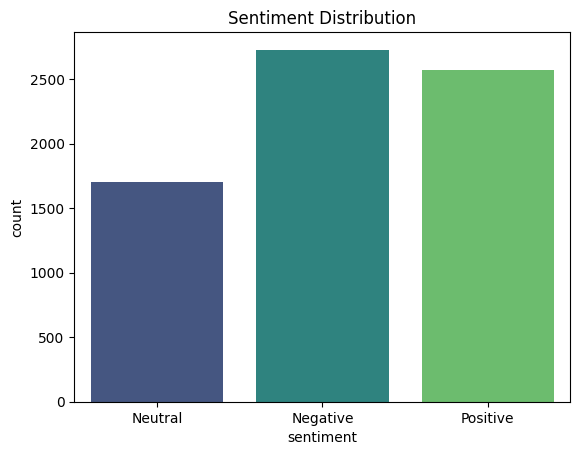

In [54]:
#vizualization of target

sns.countplot(x='sentiment', data=data, palette='viridis')
plt.title('Sentiment Distribution')
plt.show()


In [56]:
# Apply cleaning to the 'tweets' column
data['cleaned_tweet'] = data['tweets'].apply(clean_tweet)
data.head()


,tweets,likes,time,retweet_count,sentiment,cleaned_tweet
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0,Neutral,6 big questions new omicrontargeting boosters ...
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0,Negative,im confused
2,Long COVID less likely after Omicron than afte...,0,2023-03-09 18:22:43,0,Positive,long covid less likely omicron original virus ...
3,The finding don't tally with the high numbers ...,0,2023-03-09 18:21:45,0,Neutral,finding dont tally high numbers see bulletins ...
4,A conference abstract from the European Congre...,1,2023-03-09 18:21:45,1,Neutral,conference abstract european congress clinical...


In [57]:
X = data['cleaned_tweet']
y = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:

from sklearn.feature_extraction.text import TfidfVectorizer

# Now you can use TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [60]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6214285714285714

Classification Report:
               precision    recall  f1-score   support

    Negative       0.56      0.82      0.67       548
     Neutral       0.84      0.26      0.39       337
    Positive       0.67      0.65      0.66       515

    accuracy                           0.62      1400
   macro avg       0.69      0.58      0.57      1400
weighted avg       0.67      0.62      0.60      1400



In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize Logistic Regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.715

Classification Report:
               precision    recall  f1-score   support

    Negative       0.70      0.76      0.73       548
     Neutral       0.78      0.57      0.66       337
    Positive       0.70      0.76      0.73       515

    accuracy                           0.71      1400
   macro avg       0.73      0.70      0.71      1400
weighted avg       0.72      0.71      0.71      1400



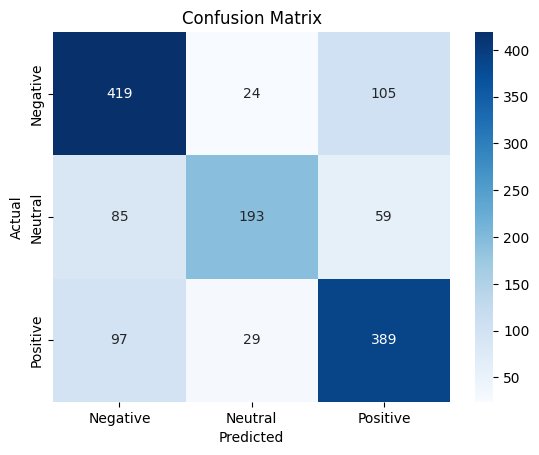

In [63]:
#confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




# **Conclusion**

# From the analysis of Omicron variant sentiment on Twitter, we observed:

# 1. Data Collection and Preprocessing:
#   - We successfully fetched  Twitter data related to the Omicron variant using the Twitter Omicron dataset file.
#   - Text preprocessing steps like removing URLs, mentions, hashtags, converting to lowercase, removing special characters, tokenization, and stop-word removal were applied to clean the tweets effectively.

# 2. Sentiment Analysis:
#   - Sentiment analysis was performed using the VADER lexicon to classify tweets as positive, negative, or neutral.
#   - Visualization of the sentiment distribution provided insights into the overall sentiment towards the Omicron variant.

# 3. Model Building and Evaluation:
#   - We utilized TF-IDF vectorizer to transform textual data into numerical features suitable for machine learning models.
#   - Two models, Multinomial Naive Bayes and Logistic Regression, were trained and evaluated for their ability to classify sentiment based on tweet content.
#   - Performance metrics like accuracy and classification report were calculated to assess model effectiveness.
#   - Confusion matrices were used to visualize the model's predictions against actual sentiment labels, helping to identify areas for potential improvement.

# 4. Overall Insights:
#   - The analysis revealed the general sentiment about the Omicron variant on Twitter during the data collection period.
#   - By analyzing the sentiment distribution, we can get a sense of public opinion and concerns about the variant.
#   - The chosen machine learning models proved effective in classifying sentiment with reasonable accuracy.

# Overall, this project demonstrates the power of sentiment analysis in understanding public opinion and extracting insights from real-time social media data. By using machine learning techniques and visualization, we can gain valuable knowledge about societal trends and public health concerns.